In [1]:
## Healthcare PGP
## Project 2 

# DESCRIPTION

# Problem Statement
# NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments 
# for the most chronic, costly, and consequential diseases.
# The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient 
# has diabetes, based on certain diagnostic measurements included in the dataset.
# Build a model to accurately predict whether the patients in the dataset have diabetes or not.
# Dataset Description
# The datasets consists of several medical predictor variables and one target variable (Outcome). 
# Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 
#Variables	Description
#Pregnancies	Number of times pregnant
#Glucose	Plasma glucose concentration in an oral glucose tolerance test
#BloodPressure	Diastolic blood pressure (mm Hg)
#SkinThickness	Triceps skinfold thickness (mm)
#Insulin	Two hour serum insulin
#BMI	Body Mass Index
#DiabetesPedigreeFunction	Diabetes pedigree function
#Age	Age in years
#Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [2]:
## Project Task: Week 1
## Data Exploration:

#1. Perform descriptive analysis. Understand the variables and their corresponding values. 
    # On the columns below, a value of zero does not make sense and thus indicates missing value:

    #• Glucose

    #• BloodPressure

    #• SkinThickness

    #• Insulin

    #• BMI

#2. Visually explore these variables using histograms. Treat the missing values accordingly.

#3. There are integer and float data type variables in this dataset. 
    # Create a count (frequency) plot describing the data types and the count of variables. 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [6]:
# Loading the data
hcd_data = pd.read_csv("/Users/anandjha/Desktop/DataScience_SimpliLearn_Purdue_University/CapstoneProject/Data-Science-Capstone-Projects-master/Project 2/Healthcare - Diabetes/health care diabetes.csv")

In [11]:
##  Total rows & columns
hcd_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# reading top 5 data values
hcd_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Data Inormation - Coumns & its types
hcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
## Data Description
hcd_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
hcd_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [16]:
## Checking Standard deviation of each column variable
hcd_data.apply(np.std)

Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

In [14]:
## Checking for Missing values
hcd_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
# Filtering Positive and Negative data

hcd_data_positive = hcd_data[hcd_data['Outcome'] == 1]
hcd_data_negative = hcd_data[hcd_data['Outcome'] == 0]

print('The count of positive data =', hcd_data_positive.shape)
print('The count of negative data =', hcd_data_negative.shape)

The count of positive data = (268, 9)
The count of negative data = (500, 9)


In [18]:
hcd_data_positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [19]:
hcd_data['Glucose'].value_counts().head(7)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
Name: Glucose, dtype: int64

Mean of Glucose level is :- 121.68160502115886
Datatype of Glucose Variable is: float64


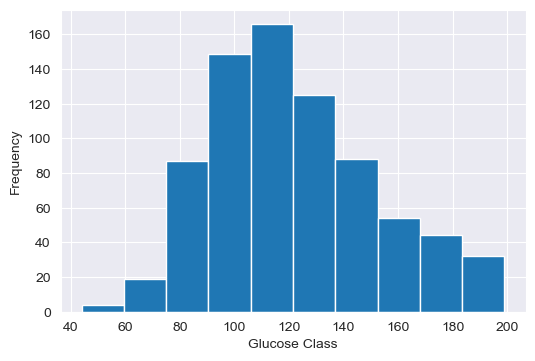

In [64]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Glucose Class')
hcd_data['Glucose'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Glucose level is :-", hcd_data['Glucose'].mean())
print("Datatype of Glucose Variable is:",hcd_data['Glucose'].dtypes)

In [35]:
glucose_zero = hcd_data[hcd_data['Glucose'] == 0]
glucose_not_zero = hcd_data[hcd_data['Glucose'] != 0]

In [36]:
# Data which is fine
glucose_not_zero.shape

(763, 9)

In [37]:
# Missing value
glucose_zero.shape

(5, 9)

In [22]:
hcd_data['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

Mean of BloodPressure level is :- 72.25480651855469
Datatype of BloodPressure Variable is: float64


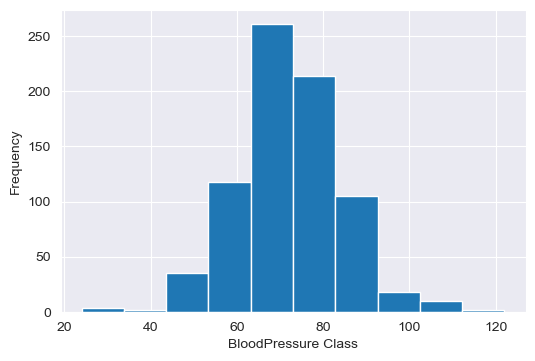

In [65]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BloodPressure Class')
hcd_data['BloodPressure'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BloodPressure level is :-", hcd_data['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",hcd_data['BloodPressure'].dtypes)

In [38]:
BP_zero = hcd_data[hcd_data['BloodPressure'] == 0]
BP_notZer = hcd_data[hcd_data['BloodPressure']!= 0]

In [40]:
#Missing value
BP_zero.shape

(35, 9)

In [42]:
skin_zero = hcd_data[hcd_data['SkinThickness'] == 0]
skin_notzero = hcd_data[hcd_data['SkinThickness']!= 0]

In [43]:
skin_zero.shape

(227, 9)

In [44]:
skin_notzero.shape

(541, 9)

In [24]:
hcd_data['SkinThickness'].value_counts().head(7)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
Name: SkinThickness, dtype: int64

Mean of SkinThickness is :- 26.606479220920118
Datatype of SkinThickness Variable is: float64


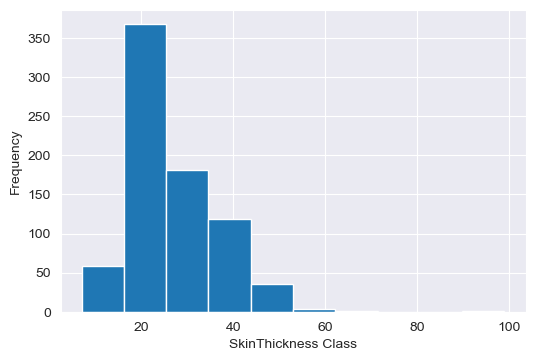

In [66]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('SkinThickness Class')
hcd_data['SkinThickness'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of SkinThickness is :-", hcd_data['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",hcd_data['SkinThickness'].dtypes)


In [26]:
hcd_data['Insulin'].value_counts().head(7)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
Name: Insulin, dtype: int64

Mean of Insulin is :- 118.66016303168442
Datatype of Insulin Variable is: float64


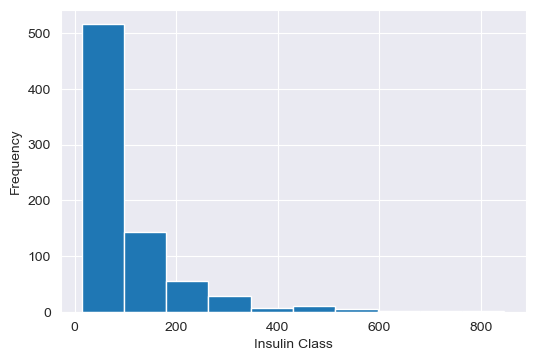

In [67]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
hcd_data['Insulin'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Insulin is :-", hcd_data['Insulin'].mean())
print("Datatype of Insulin Variable is:",hcd_data['Insulin'].dtypes)

In [45]:
ins_zero = hcd_data[hcd_data['Insulin'] == 0]
ins_notzero = hcd_data[hcd_data['Insulin'] != 0]

In [46]:
ins_zero.shape

(374, 9)

In [47]:
ins_notzero.shape

(394, 9)

In [28]:
hcd_data['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

Mean of BMI is :- 32.45080515543617
Datatype of BMI Variable is: float64


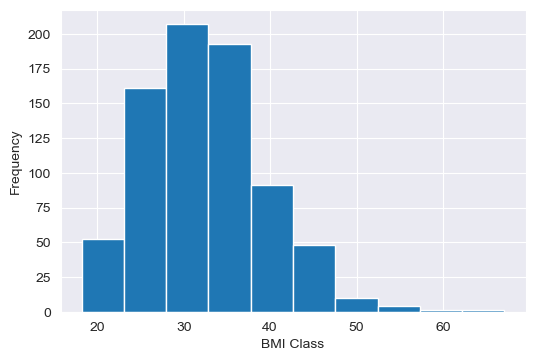

In [68]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI Class')
hcd_data['BMI'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BMI is :-", hcd_data['BMI'].mean())
print("Datatype of BMI Variable is:",hcd_data['BMI'].dtypes)

In [53]:
BMI_zero = hcd_data[hcd_data['BMI'] == 0]
BMI_notzero = hcd_data[hcd_data['BMI'] != 0]

In [54]:
#Missing value
BMI_zero.shape

(11, 9)

In [55]:
BMI_notzero.shape

(757, 9)

In [52]:
# Missing Value Detils....
# •Glucose = (5,9)
# •	BloodPressure (35,9)
# •	SkinThickness (227,9)
# •	Insulin (374,9)
# •BMI (11,9)

# As we can see that there are missing values, since the dataset is very small, 
# we will not remove the data, instead we will impute it with the mean values.

In [57]:
# Imputing MEAN values

hcd_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = hcd_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

hcd_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [58]:
# Imputing the Mean data

hcd_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = hcd_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].fillna(value = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].mean())

hcd_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
# Now the Missing values has been treated and filled with Mean values()

/Users/anandjha/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


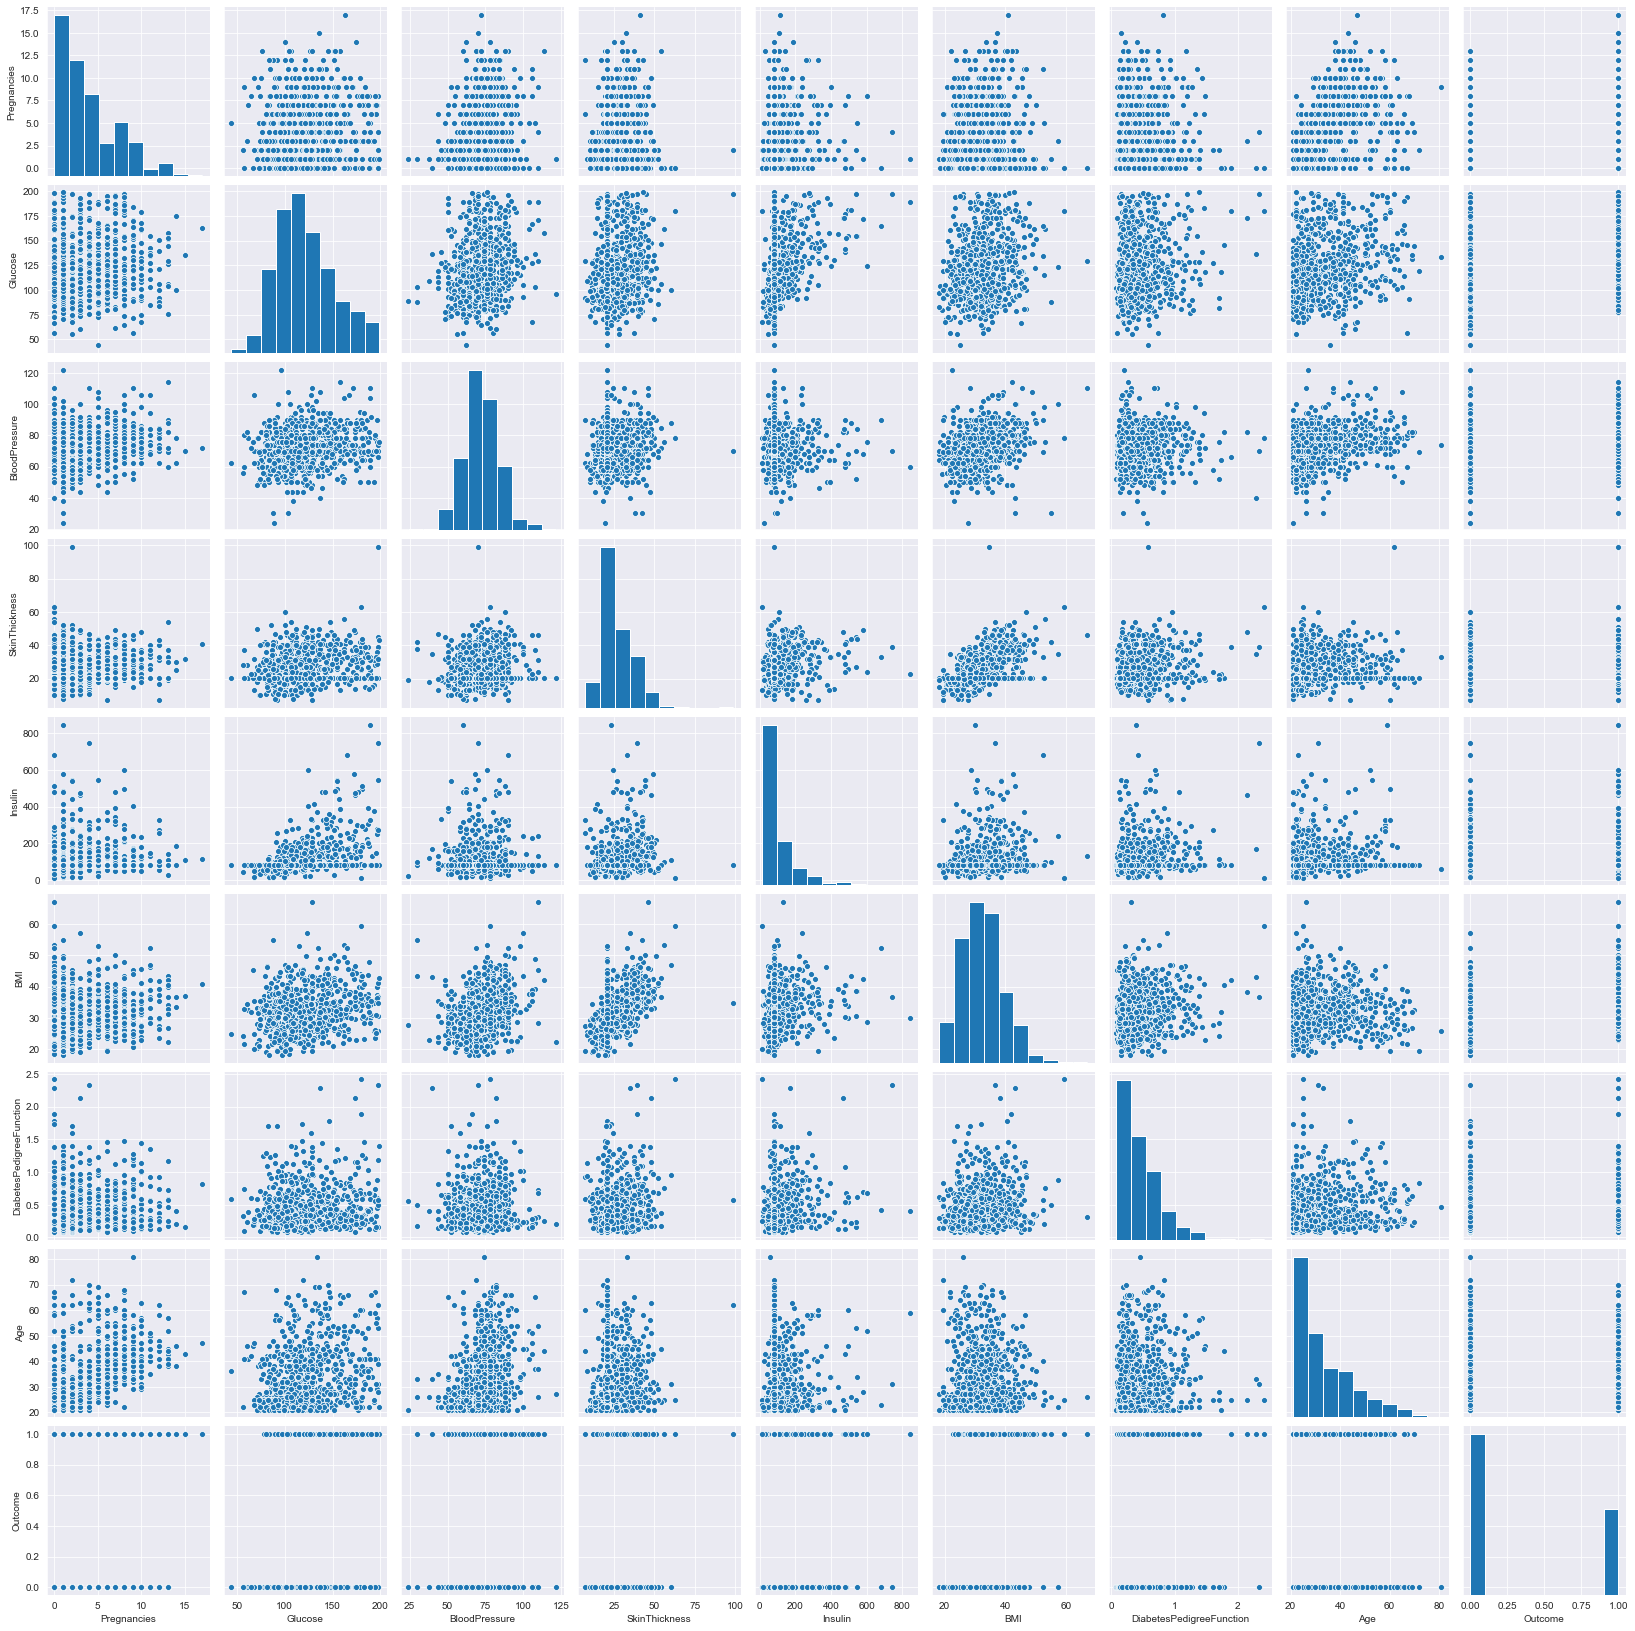

In [62]:
# Plot data and let see how it looks

sns.pairplot(hcd_data,size=2.5)

In [161]:
# We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness
# and BMI, Pregnancies and age it looks like there is small chance of positive correlation.

In [74]:
## As we can see from the above charts most of our data a not skewed and are have biased information.

In [71]:
## Project Task: Week 2
## Data Exploration:

# 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

# 2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

# 3. Perform correlation analysis. Visually explore it using a heat map.

<AxesSubplot:title={'center':'Checking Missing Value with Heatmap'}>

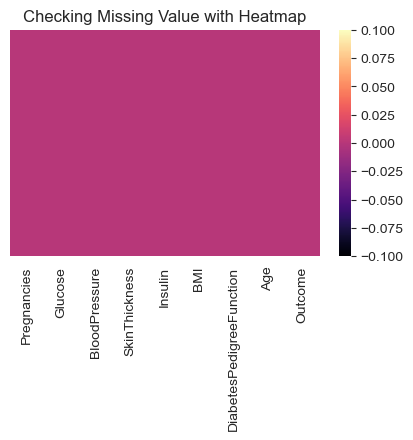

In [69]:
## Using Heat map To check missing values
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(hcd_data.isnull(),cmap='magma',yticklabels=False)

In [72]:
# Corelation metrics
hcd_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot:>

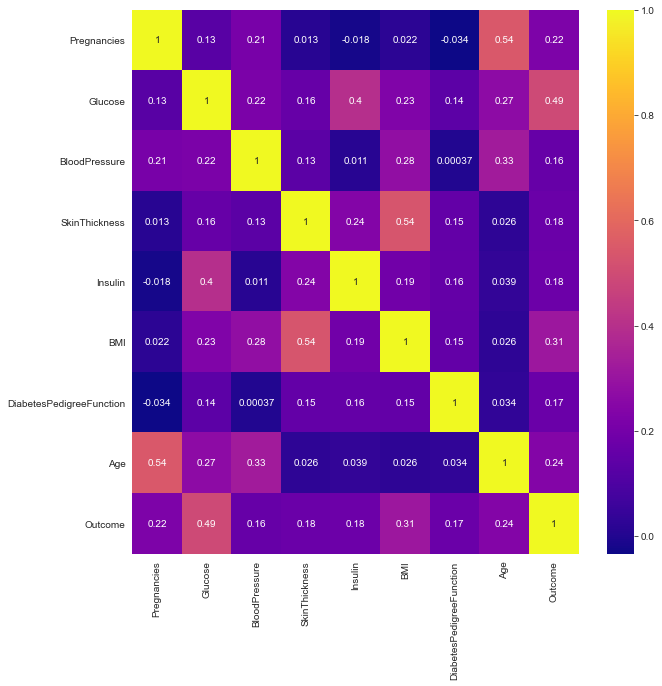

In [73]:
# plotting correlation
plt.subplots(figsize=(10,10))
sns.heatmap(hcd_data.corr(),annot= True,cmap = 'plasma')

In [81]:
## Scatter plot

BloodPressure = hcd_data_positive['BloodPressure']
Glucose = hcd_data_positive['Glucose']
SkinThickness = hcd_data_positive['SkinThickness']
Insulin = hcd_data_positive['Insulin']
BMI = hcd_data_positive['BMI']

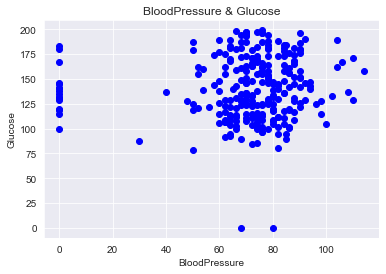

In [82]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

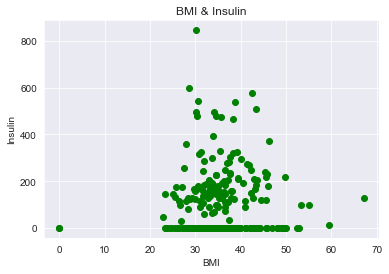

In [88]:
plt.scatter(BMI, Insulin, color=['g'])
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.title('BMI & Insulin')
plt.show()

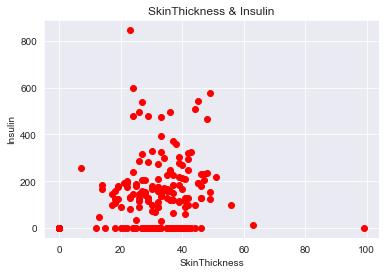

In [87]:
plt.scatter(SkinThickness, Insulin, color=['r'])
plt.xlabel('SkinThickness')
plt.ylabel('Insulin')
plt.title('SkinThickness & Insulin')
plt.show()

In [162]:
## Project Task: Week 3
## Data Modeling:

#1. Devise strategies for model building. It is important to decide the right validation framework. 
    #Express your thought process.

#2. Apply an appropriate classification algorithm to build a model. 
    #Compare various models with the results from KNN algorithm.

## Project Task: Week 4
## Data Modeling:

# 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. 
#    Please be descriptive to explain what values of these parameter you have used.

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import average_precision_score,auc,f1_score,precision_recall_curve

In [91]:
# Features and Lables determination

# As we know by this time the Target variable is Outcome and rest of the variables are features

features = hcd_data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = hcd_data.iloc[:,8].values

In [140]:
x=hcd_data.iloc[:,:-1].values
y=hcd_data.iloc[:,-1].values

In [92]:
## Train Test split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)


In [132]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [134]:
from sklearn.preprocessing import StandardScaler

Scale=StandardScaler()
x_train_std=Scale.fit_transform(X_train)
x_test_std=Scale.transform(X_test)

In [135]:
norm = lambda a:(a-min(a))/(max(a)-min(a))

In [136]:
hcd_data_norm = hcd_data.iloc[:,:-1]

In [138]:
hcd_normalized = hcd_data_norm.apply(norm)

In [141]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(hcd_normalized.values,y,test_size=0.20,random_state=0)


In [142]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [94]:
# Create model
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/Users/anandjha/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [95]:
print(lr_model.score(X_train,y_train))
print(lr_model.score(X_test,y_test))

0.7703583061889251
0.7337662337662337


In [143]:
conf_mat = confusion_matrix(y_test,lr_model.predict(X_test))

conf_mat

array([[84, 11],
       [30, 29]])

In [144]:
print(classification_report(y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        95
           1       0.72      0.49      0.59        59

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.72       154



AUC: 0.839


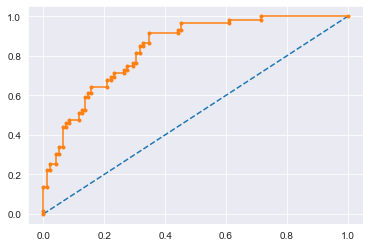

In [104]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)

# ROC Curve

# predict probabilities
probs = lr_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [105]:
## Applying Decission Tree Classifier Model

dtc_model = DecisionTreeClassifier(max_depth=5)
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [106]:
dtc_model.score(X_train,y_train)

0.8257328990228013

In [107]:
## Applying Random Forest Model

rfc_model = RandomForestClassifier(n_estimators=11)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [116]:
print(rfc_model.score(X_train,y_train))
print(rfc_model.score(X_test,y_test))

0.9853420195439739
0.7272727272727273


In [159]:
print("\n","Classification Report For Random Forest::")
print(classification_report(y_test,rfc_model.predict(X_test)),'\n')


 Classification Report For Random Forest::
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        95
           1       0.68      0.54      0.60        59

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154
 



In [109]:
## Support Vector Classifier(SVM) Model

svm_model = SVC(kernel='rbf',gamma='auto')
svm_model.fit(X_train,y_train)

SVC(gamma='auto')

In [111]:
svm_model.score(X_test,y_test)

0.6168831168831169

In [151]:
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 

In [156]:
svc_model_linear.fit(X_train,y_train)

SVC(C=0.01, kernel='linear', probability=True, random_state=0)

In [157]:
print(classification_report(y_test,svc_model_linear.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        95
           1       0.68      0.44      0.54        59

    accuracy                           0.71       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.70      0.71      0.69       154



In [112]:
## Applying K-NN
knn_model = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [117]:
print(knn_model.score(X_train,y_train))
print(knn_model.score(X_test,y_test))

0.8078175895765473
0.7142857142857143


In [158]:
print("\n","Classification Report for kNN::")
print(metrics.classification_report(y_test,knn_model.predict(X_test)),'\n')


 Classification Report for kNN::
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        95
           1       0.64      0.58      0.61        59

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154
 



AUC: 0.847
True Positive Rate - [0.         0.05223881 0.23880597 0.44029851 0.64925373 0.77238806
 0.9141791  0.99253731 1.        ], False Positive Rate - [0.    0.002 0.014 0.06  0.136 0.276 0.424 0.666 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

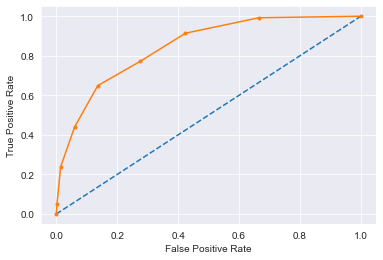

In [118]:
## Preparing ROC Curve (Receiver Operating Characteristics Curve) for KNN Model

# predict probabilities
probs = knn_model.predict_proba(features)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

f1=0.614 auc=0.723 ap=0.724


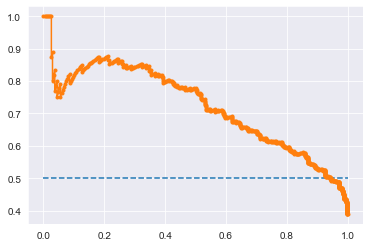

In [119]:
## Precision Recall Curve for Logistic Regression

# predict probabilities
probs = lr_model.predict_proba(features)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = lr_model.predict(features)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)

# calculate F1 score
f1 = f1_score(label, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.682 auc=0.754 ap=0.715


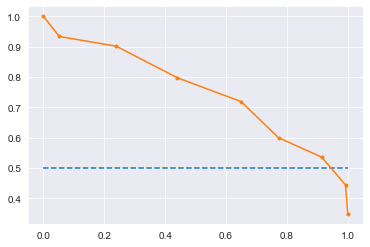

In [120]:
## Precision Recall Curve for KNN

# predict probabilities
probs = knn_model.predict_proba(features)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = knn_model.predict(features)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)

# calculate F1 score
f1 = f1_score(label, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.719 auc=0.809 ap=0.770


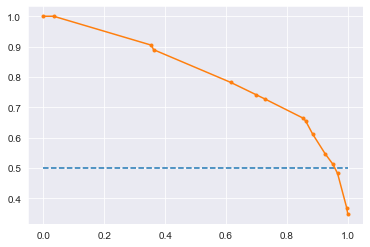

In [121]:
##  Recall Curve for Decission Tree Classifier

# predict probabilities
probs = dtc_model.predict_proba(features)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = dtc_model.predict(features)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)

# calculate F1 score
f1 = f1_score(label, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.903 auc=0.959 ap=0.950


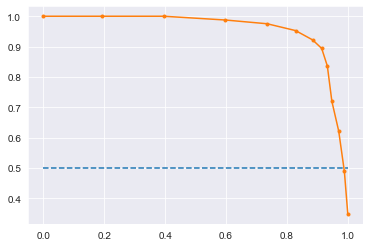

In [122]:
## Precision Recall Curve for Random Forest

# predict probabilities
probs = rfc_model.predict_proba(features)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = rfc_model.predict(features)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)

print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')

# calculate F1 score
f1 = f1_score(label, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [128]:
# MultinominalNB Model

mnb_model = MultinomialNB()

mnb_model.fit(X_train,y_train)

print(mnb_model.score(X_train,y_train))
print(mnb_model.score(X_test,y_test))

0.6628664495114006
0.6168831168831169


AUC: 0.607
True Positive Rate - [0.         0.01694915 0.01694915 0.11864407 0.11864407 0.15254237
 0.15254237 0.18644068 0.18644068 0.20338983 0.20338983 0.23728814
 0.23728814 0.27118644 0.27118644 0.28813559 0.28813559 0.30508475
 0.30508475 0.33898305 0.33898305 0.3559322  0.3559322  0.37288136
 0.37288136 0.42372881 0.42372881 0.44067797 0.44067797 0.47457627
 0.47457627 0.49152542 0.49152542 0.50847458 0.50847458 0.57627119
 0.57627119 0.59322034 0.59322034 0.62711864 0.62711864 0.6440678
 0.6440678  0.66101695 0.66101695 0.6779661  0.6779661  0.71186441
 0.71186441 0.72881356 0.72881356 0.74576271 0.74576271 0.76271186
 0.76271186 0.83050847 0.83050847 0.86440678 0.86440678 0.88135593
 0.88135593 0.89830508 0.89830508 0.93220339 0.93220339 0.94915254
 0.94915254 1.         1.        ], False Positive Rate - [0.         0.         0.01052632 0.01052632 0.03157895 0.03157895
 0.05263158 0.05263158 0.07368421 0.07368421 0.08421053 0.08421053
 0.10526316 0.10526316 0.13684211 0.1368

Text(0, 0.5, 'True Positive Rate')

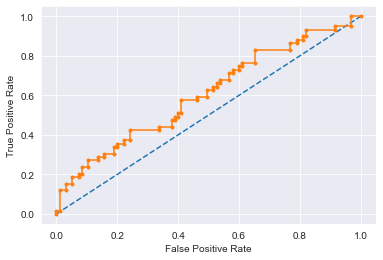

In [129]:
## Preparing ROC Curve (Receiver Operating Characteristics Curve) for MultinominalNB

# predict probabilities
probs = mnb_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)

print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [130]:
# SVM Model

svc_model = SVC(kernel = 'rbf',probability=True)

svc_model.fit(X_train,y_train)

print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.7768729641693811
0.6948051948051948


AUC: 0.794
True Positive Rate - [0.         0.01694915 0.03389831 0.03389831 0.13559322 0.13559322
 0.18644068 0.18644068 0.22033898 0.22033898 0.25423729 0.25423729
 0.30508475 0.30508475 0.3220339  0.3220339  0.3559322  0.3559322
 0.37288136 0.37288136 0.38983051 0.38983051 0.45762712 0.45762712
 0.52542373 0.52542373 0.54237288 0.54237288 0.57627119 0.57627119
 0.66101695 0.66101695 0.71186441 0.71186441 0.74576271 0.74576271
 0.76271186 0.76271186 0.77966102 0.77966102 0.83050847 0.83050847
 0.86440678 0.86440678 0.88135593 0.88135593 0.91525424 0.91525424
 0.93220339 0.93220339 0.94915254 0.94915254 0.96610169 0.96610169
 0.98305085 0.98305085 1.         1.        ], False Positive Rate - [0.         0.         0.         0.01052632 0.01052632 0.02105263
 0.02105263 0.03157895 0.03157895 0.04210526 0.04210526 0.06315789
 0.06315789 0.07368421 0.07368421 0.08421053 0.08421053 0.10526316
 0.10526316 0.11578947 0.11578947 0.12631579 0.12631579 0.14736842
 0.14736842 0.16842105 0.1684

Text(0, 0.5, 'True Positive Rate')

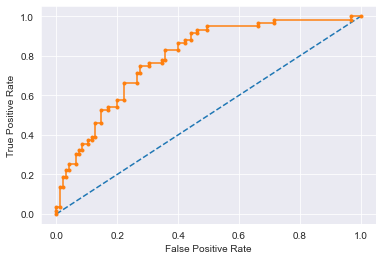

In [131]:
## Preparing ROC Curve (Receiver Operating Characteristics Curve) for MultinominalNB

# predict probabilities
probs = svc_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [160]:
# So we can see Random Forest Classifier is best among all, you might be wondering auc score is lesser by 1 
# than others also i am considering it to be best because balance of classes between Precision and Recall is 
# far better than other Models. So we can consider a loss in AUC by 1

In [163]:
## Project Task: Week 4
## Data Reporting:

#2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. 
    # The dashboard must entail the following:

#a. Pie chart to describe the diabetic or non-diabetic population

#b. Scatter charts between relevant variables to analyze the relationships

#c. Histogram or frequency charts to analyze the distribution of the data

#d. Heatmap of correlation analysis among the relevant variables

#e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets
    # using a bubble chart.

In [ ]:
## Link To Tableau Visualization 
#  https://public.tableau.com/profile/anand.jha#!/vizhome/Diabetesanalysis_16078457260250/DiabeticAnalysisHealthCareProjectVisualization